# Computational modeling of stem and progenitor cell kinetics identifies plausible hematopoietic lineage hierarchies 
## Results Comparison of Topologies and number of intermediate states - reduced data set (4 healthy individuals)

In [1]:
#from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.patches as patches
from matplotlib.ticker import FuncFormatter, MaxNLocator
#from matplotlib import rc
import scipy.io as sio
import fnmatch as fnm
#import h5py
#import math
#from scipy import stats
import os
#import re
#%matplotlib inline

#### specify path were results can be found and figures should be saved

In [2]:
current_dir_str = os.getcwd()
current_dir_str 

'D:\\Documents\\MATLAB\\HematopoiesisModelComparison_restructured\\Python'

In [3]:
os.chdir('../')
os.chdir('./MATLAB/model_comparison_analysis')
matlab_dir_str = os.getcwd()

#### specify if figures should be saved

In [4]:
opt_save = True

#### load defined functions

In [41]:
os.chdir(current_dir_str)
%run "definedFunctions.ipynb"

#### define colors and compartments

In [6]:
CT = ['HSC','MPP','MLP','CMP','GMP','MEP','mat']
cols_CT = sns.color_palette(['#CC0000','#FF8000','#003366','#6600CC','#00994C','#57D7F7','#FFE00E','#A0A0A0']);

colors = ['#000000', '#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000','#000000']
#colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

In [7]:
plt = loadPltSettings(20,10) #fonsize, markersize

In [8]:
N_is = range(1,6)

noise_type = 'LogNormal'
#noise_type = 'LogLaplace'

folder_str = []
for N_ID in N_is:
    folder_str.append("/results_7divs_"+str(N_ID)+"iS_HO_"+noise_type+"_fit_iC")

M_names = list('ABCDEFGHIJ')
subfolder_str = []
model_str = list()
for M_ID in M_names:
    subfolder_str.append("/model_"+M_ID+"_model/")
    model_str.append("model_"+M_ID)

I_names = ['482_1','522_1','353_1','559_1']
N_indi = len(I_names)
subsubfolder_str = []
for I_ID in I_names:
    subsubfolder_str.append("individual_"+I_ID)
      
results_str = matlab_dir_str + "/results_7divs_allNiS_HO_"+noise_type+"_fit_iC/"   
try:  
    os.mkdir(results_str)
except OSError:  
    print ("Creation of the directory %s failed" % results_str)
else:  
    print ("Successfully created the directory %s " % results_str)
    
opt_all = False
bool_fit_repetitions_seperately = True
last_SSF_str = subsubfolder_str[-1] #['/'+subsubfolder_str_i for subsubfolder_str_i in subsubfolder_str]

Creation of the directory D:\Documents\MATLAB\HematopoiesisModelComparison_restructured\MATLAB\model_comparison_analysis/results_7divs_allNiS_HO_LogNormal_fit_iC/ failed


### Which model performs best?

#### BIC values per hierarchy and indiviudual for the number of intermediate states ranging from 1 to 5 and n_is=10

In [9]:
bool_intermedStates=True
[Scores_BIC, Scores_BIC_all] = getScores(matlab_dir_str,folder_str,subfolder_str,subsubfolder_str,'','BIC',bool_fit_repetitions_seperately,bool_intermedStates)

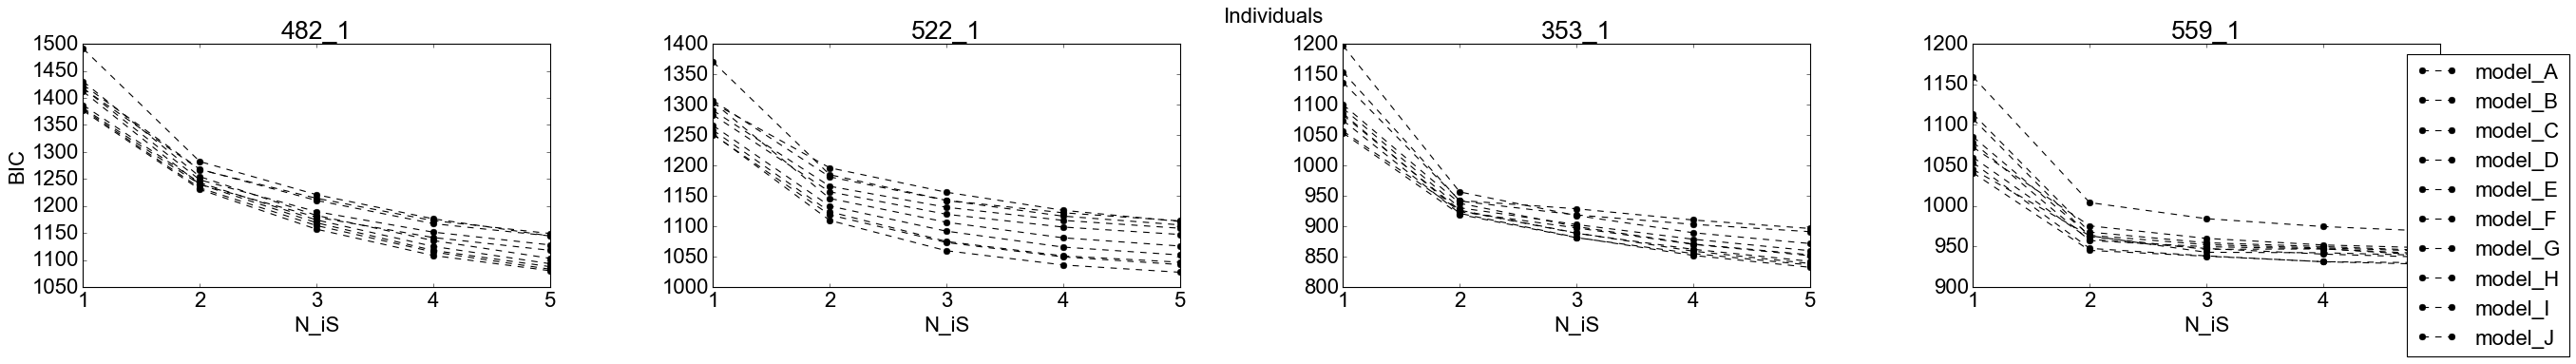

In [10]:
plot_scores_vs_nis_per_model_and_individual(subsubfolder_str,model_str,N_is,Scores_BIC,'BIC',results_str,True,bool_fit_repetitions_seperately,opt_save)

In [11]:
#plot_scores_vs_nis_per_model_and_individual(subsubfolder_str,model_str,N_is,Scores_BIC,'BIC',results_str,False,bool_fit_repetitions_seperately,opt_save)

#### BIC values per hierarchy for all 6 indiviuduals for the number of intermediate states ranging from 1 to 5

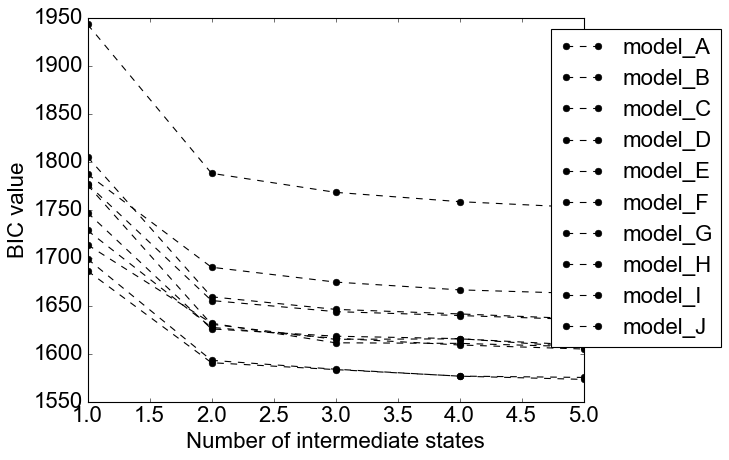

In [12]:
plot_scores_vs_nis_per_model(model_str,N_is,Scores_BIC_all,'BIC',results_str,False,opt_save)

In [13]:
[LOGL, LOGL_all] = getScores(matlab_dir_str,folder_str,subfolder_str,subsubfolder_str,'','LOGL',bool_fit_repetitions_seperately,bool_intermedStates)

In [14]:
#L = np.matrix(LOGL)
#L[:,0]

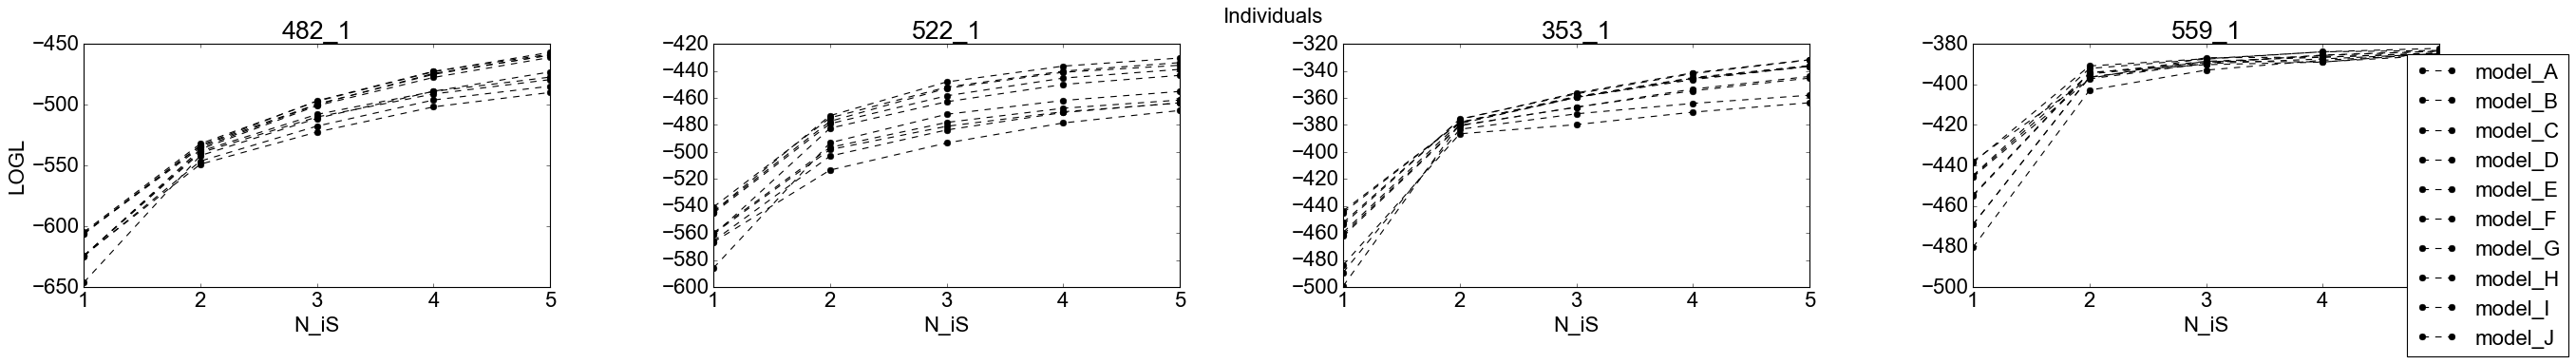

In [15]:
plot_scores_vs_nis_per_model_and_individual(subsubfolder_str,model_str,N_is,LOGL,'LOGL',results_str,True,bool_fit_repetitions_seperately,opt_save)

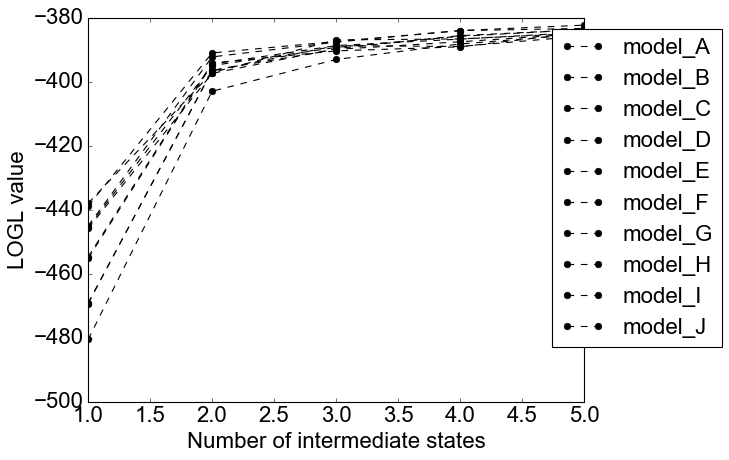

In [16]:
plot_scores_vs_nis_per_model(model_str,N_is,LOGL_all,'LOGL',results_str,False,opt_save)

average increase/ decrease of logL (between n_is and n_is + 1) per n_is increase:

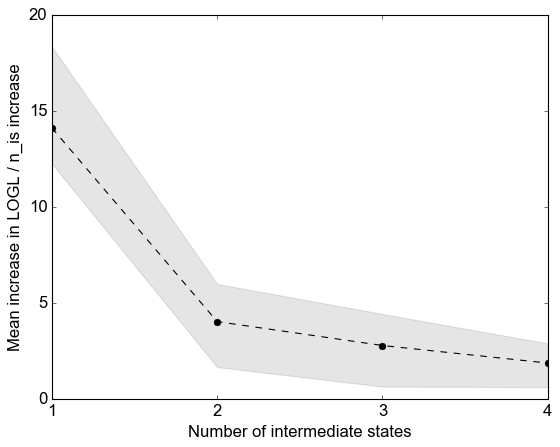

In [19]:
plt = loadPltSettings(15,10) #fonsize, markersize
plot_change_in_Score(LOGL,'LOGL',I_names,M_names,N_is,results_str,False,False,colors,opt_save)

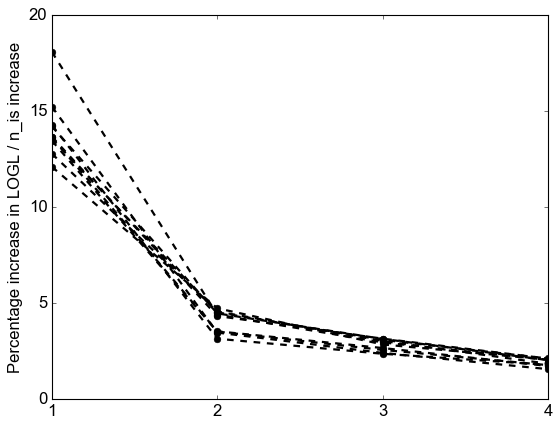

In [25]:
plot_change_in_Score(LOGL,'LOGL',I_names,M_names,N_is,results_str,True,False,colors,opt_save)

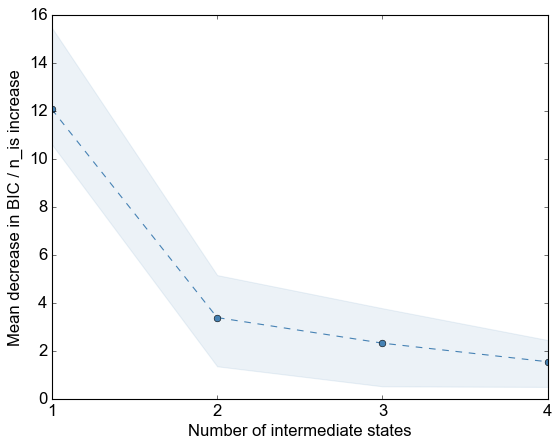

In [19]:
plt = loadPltSettings(15,10) #fonsize, markersize
plot_change_in_Score(Scores_BIC,'BIC',I_names,M_names,N_is,results_str,False,False,colors,opt_save)

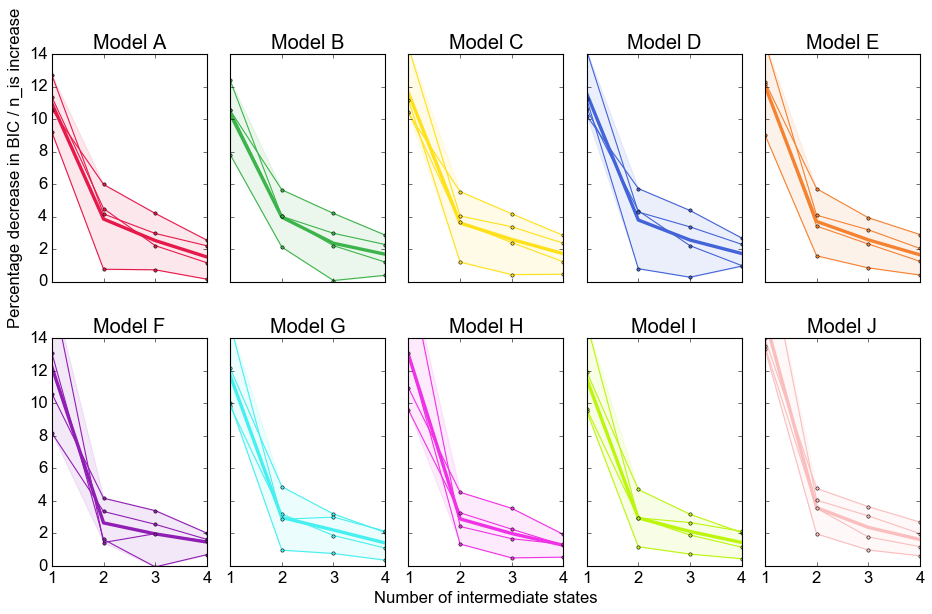

In [20]:
plot_change_in_Score(Scores_BIC,'BIC',I_names,M_names,N_is,results_str,True,True,colors,opt_save)

In [26]:
[Time_in_min, Time_in_min_all] = getScores(matlab_dir_str,folder_str,subfolder_str,subsubfolder_str,'','TIME',bool_fit_repetitions_seperately,bool_intermedStates)
[Time_cpu_in_min, Time_cpu_in_min_all] = getScores(matlab_dir_str,folder_str,subfolder_str,subsubfolder_str,'','TIME_CPU',bool_fit_repetitions_seperately,bool_intermedStates)

In [27]:
#Time_cpu_in_min

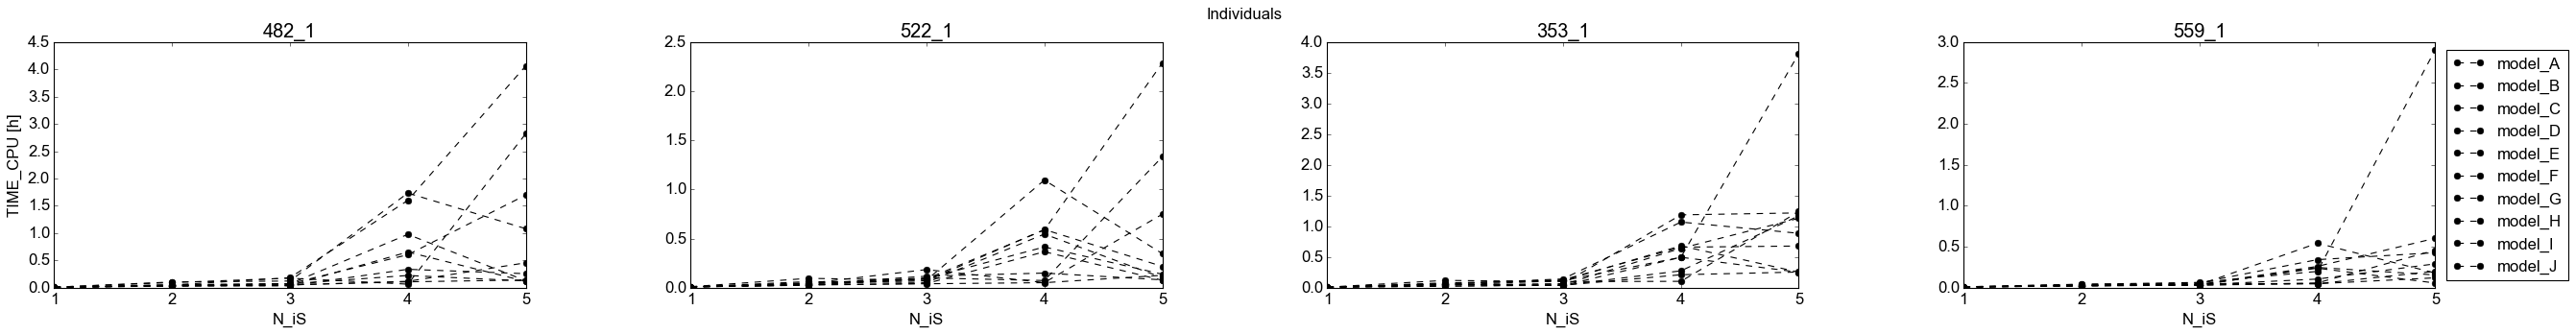

In [28]:
plot_scores_vs_nis_per_model_and_individual(subsubfolder_str,model_str,N_is,Time_cpu_in_min/60,'TIME_CPU',results_str,True,bool_fit_repetitions_seperately,opt_save)

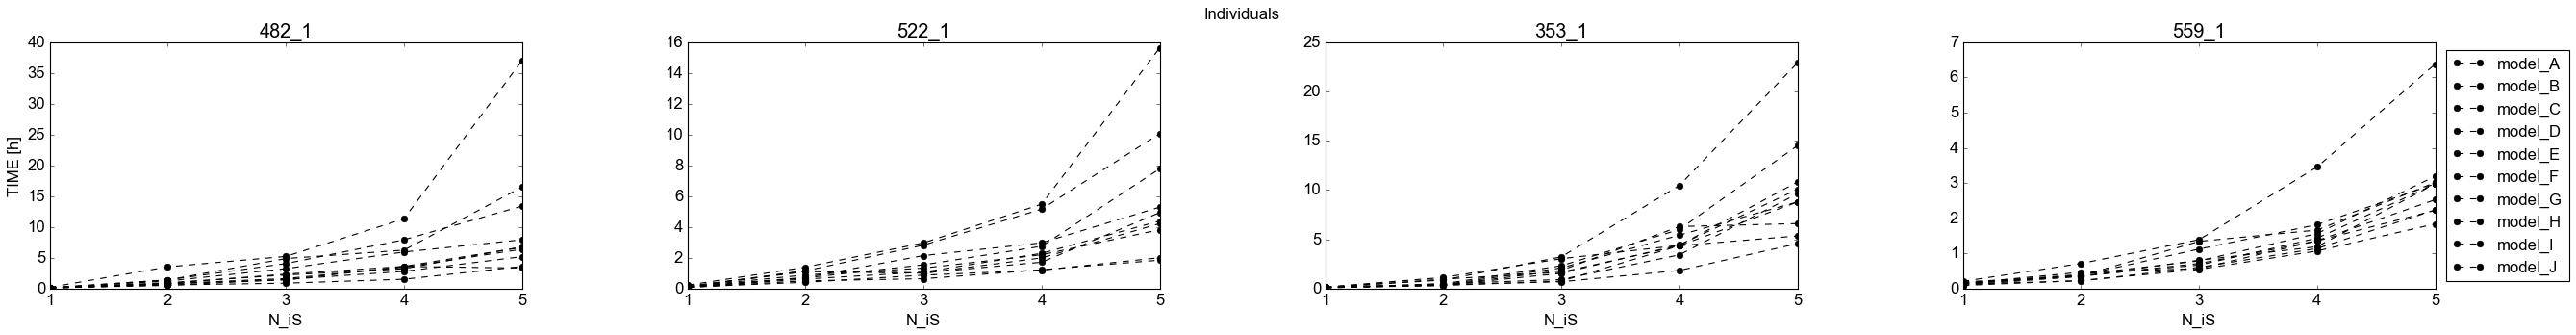

In [29]:
plot_scores_vs_nis_per_model_and_individual(subsubfolder_str,model_str,N_is,Time_in_min/60,'TIME',results_str,True,bool_fit_repetitions_seperately,opt_save)

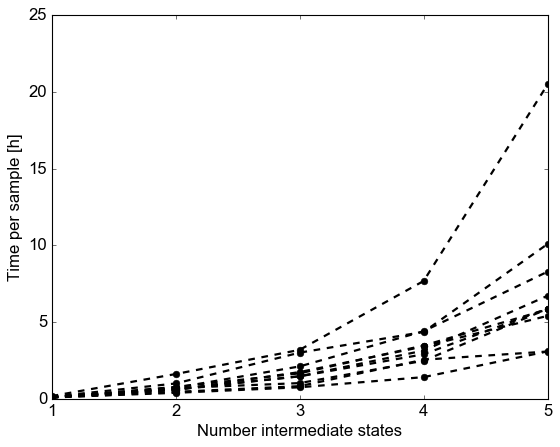

In [33]:
N_indi = len(I_names)
plot_time_vs_Nis(Time_in_min_all/60,Time_in_min/60,M_names,N_is,N_indi,results_str,colors,False,opt_save)

### Practically identifiable parameters

In [34]:
par_transformation='log10'
bool_identifiablePars_only=False
bool_weights=False
bool_test_par=False
bool_CIs=True
bool_boundaries=True
bool_fit_repetitions_seperately = False
for m_id in range(0,len(subfolder_str)):
    for n_is in range(0,len(folder_str)):
        DF_TMP=[]
        MATLAB_str = matlab_dir_str+folder_str[n_is]+subfolder_str[m_id];
        DF_TMP,rate_names_opt = get_par_estimates(MATLAB_str, last_SSF_str, M_names[m_id], CT, par_transformation,bool_identifiablePars_only,bool_weights,bool_test_par,bool_CIs,bool_boundaries,bool_fit_repetitions_seperately);
        DF_TMP.insert(2, "N_is", N_is[n_is]*np.ones((1,len(DF_TMP))).flatten(), True);
        if n_is==0 and m_id==0:
            DF_nis = DF_TMP.copy();
        else:
            DF_nis = pd.concat(objs = [DF_nis,DF_TMP],axis=0,ignore_index=True,sort=False);


In [35]:
#DF_nis[(DF_nis['Model']=='model_B')]

In [36]:
rate_names = DF_nis.columns[np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(DF_nis.columns!='Model', DF_nis.columns!='Sample_ID_long'),DF_nis.columns!='N_is'),DF_nis.columns!='Sample_ID'),DF_nis.columns.str.endswith('CI_l')==False),DF_nis.columns.str.endswith('CI_u')==False),DF_nis.columns.str.endswith('_min')==False),DF_nis.columns.str.endswith('_max')==False)]

In [37]:
rate_names

Index(['a_HSC_MPP', 'b_HSC', 'g_HSC', 'a_MPP_MLP', 'a_MPP_CMP', 'b_MPP',
       'g_MPP', 'a_MLP', 'b_MLP', 'a_CMP_GMP', 'a_CMP_MEP', 'b_CMP', 'g_CMP',
       'a_GMP_mat', 'b_GMP', 'g_GMP', 'a_MEP_mat', 'b_MEP', 'g_MEP', 'b_mat',
       'g_mat', 'a_MLP_GMP', 'a_HSC_mat', 'a_HSC_MEP', 'a_MPP_MEP',
       'a_HSC_CMP', 'a_MPP_GMP'],
      dtype='object')

percentage of identifiable parameters:

In [38]:
identifiable_counts = np.zeros((len(subfolder_str),len(N_is),N_indi),dtype=float)
identifiable_percent = np.zeros((len(subfolder_str),len(N_is),N_indi),dtype=float)
for m_id,model in enumerate(M_names):
    DF_nis_m = DF_nis[DF_nis['Model']=='model_'+model].copy()
    rate_names_m=[]
    rate_names_m = np.array(DF_nis_m.columns[np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(DF_nis_m.columns!='Model', DF_nis_m.columns!='Sample_ID_long'),DF_nis_m.columns!='N_is'),DF_nis_m.columns!='Sample_ID'),DF_nis_m.columns.str.endswith('CI_l')==False),DF_nis_m.columns.str.endswith('CI_u')==False),DF_nis_m.columns.str.endswith('_min')==False),DF_nis_m.columns.str.endswith('_max')==False)])
    identifiable_bools_m = np.zeros((len(N_is),len(rate_names_m),N_indi),dtype=bool)
    for n_is_id,n_is in enumerate(N_is):
    #n_is_id =0
    #n_is = N_is[n_is_id]
        for rate_id,rate in enumerate(rate_names_m):
            identifiable_bools_m[n_is_id,rate_id,:] = np.array(np.logical_and(DF_nis_m[(DF_nis_m['N_is']==n_is)][rate+'_CI_u'].astype(np.float64)<DF_nis_m[(DF_nis_m['N_is']==n_is)][rate+'_max'], DF_nis_m[(DF_nis_m['N_is']==n_is)][rate+'_CI_l'].astype(np.float64)>DF_nis_m[(DF_nis_m['N_is']==n_is)][rate+'_min']))
        identifiable_counts[m_id,n_is_id,:] = np.sum(identifiable_bools_m[n_is_id,:,:], axis=0)
    identifiable_percent[m_id,:,:] = (identifiable_counts[m_id]*100)/len(rate_names_m)


C:\Users\PowerWS\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:897: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


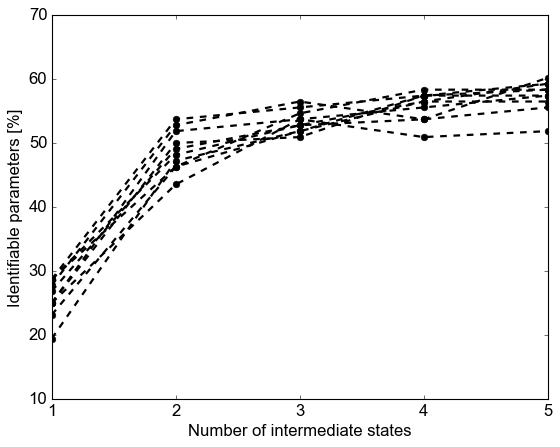

In [42]:
plot_percentage_identifiable_parameters_per_intermediate_state(identifiable_percent,M_names,colors,False,opt_save)

In [54]:
I_list = DF_nis['Sample_ID'].unique()
N_is_list = DF_nis['N_is'].unique()
for m_id,model in enumerate(M_names):
    for i_id,individual in enumerate(I_list):
        DF_S = DF_nis[((DF_nis['Sample_ID']==individual) & (DF_nis['Model']=='model_'+model))].copy()
        plot_par_with_CI_vs_N_is(DF_S, results_str, model, individual, N_is_list, CT, par_transformation, colors, opt_save)